## Importing necessary libraries

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Importing dataset

In [30]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Checking the null values in the dataset

In [32]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## Dropping the rows with null values

In [33]:
df.dropna(inplace = True)

In [34]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Ocean proximity values

In [35]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

## Typecasting the column with int values in it

In [36]:
pd.get_dummies(df.ocean_proximity).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


## Joining the int columns in the dataset

In [37]:
df = df.join(pd.get_dummies(df.ocean_proximity).astype(int))

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
 10  <1H OCEAN           20433 non-null  int64  
 11  INLAND              20433 non-null  int64  
 12  ISLAND              20433 non-null  int64  
 13  NEAR BAY            20433 non-null  int64  
 14  NEAR OCEAN          20433 non-null  int64  
dtypes: float64(9), int64(5), object(1)
memory usage: 3.0+

## Drop original string column

In [39]:
df.drop(columns = ['ocean_proximity'], inplace=True)

## Correlation matrix

<Axes: >

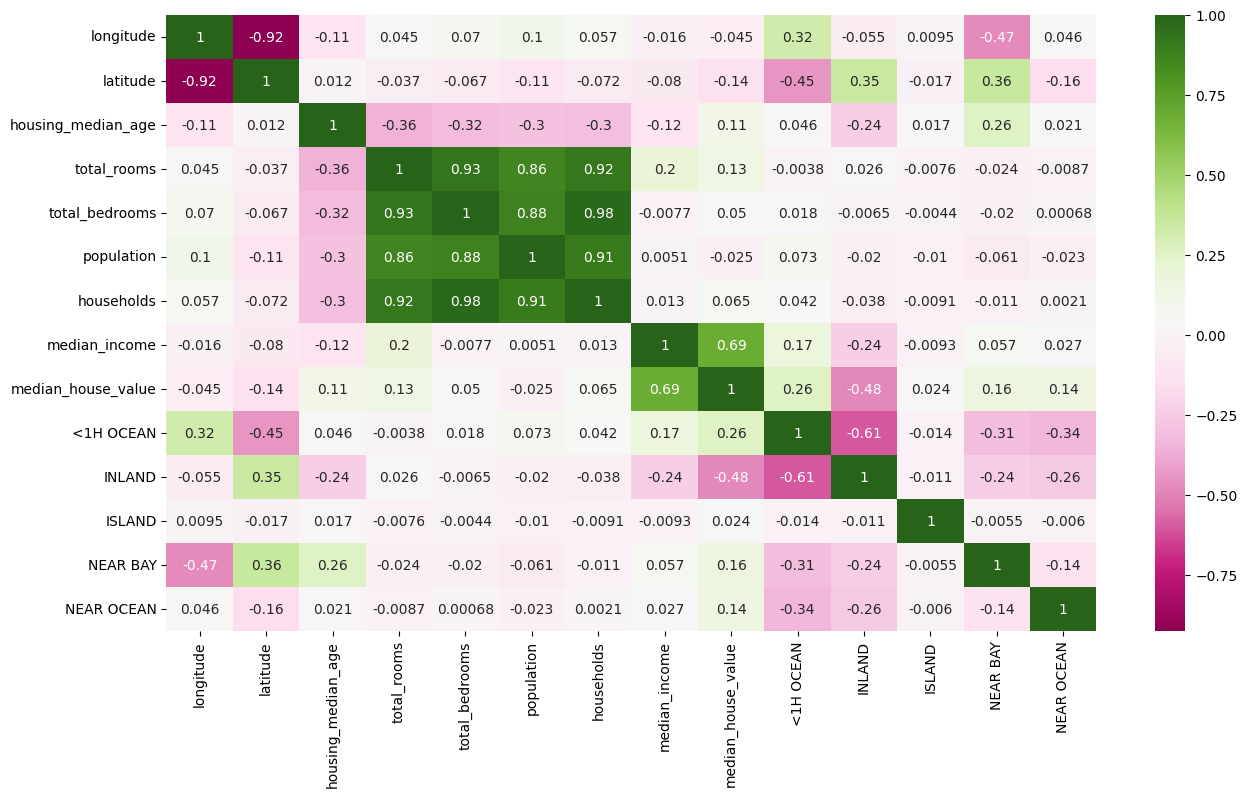

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'PiYG')

## Multi column selection

In [18]:
df['total_rooms'] = np.log(df['total_rooms']  + 1)
df['total_bedrooms'] = np.log(df['total_bedrooms']  + 1)
df['population'] = np.log(df['population']  + 1)
df['households'] = np.log(df['households']  + 1)

## Getting info through relative values

In [19]:
df['bedroom_ratio'] = df['total_bedrooms']/df['total_rooms']
df['household_rooms'] = df['total_rooms']/df['households']

## Splitting dataset into train and test set

In [20]:
from sklearn.model_selection import train_test_split
X = df.drop(['median_house_value'], axis = 1)
y = df['median_house_value']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.25)

## Applying Linear regression

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

## Applying Random Forest for regression purpose

In [22]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [28]:
rfr.score(X_train, y_train)  # Checking train data accuracy

0.9728529561371388

In [24]:
rfr.score(X_test, y_test)   # Checking test data accuracy

0.8314298509684626

## Predicting values based on given features

In [26]:
pred = rfr.predict([[-122.23, 37.88, 43.0, 5.781058, 6.867534, 4.777652, 3.844187, 7.3252, 0, 1, 0, 0, 0, 0.717813, 1.399834]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [27]:
print(pred)  # Printing predicted value

[347167.05]
